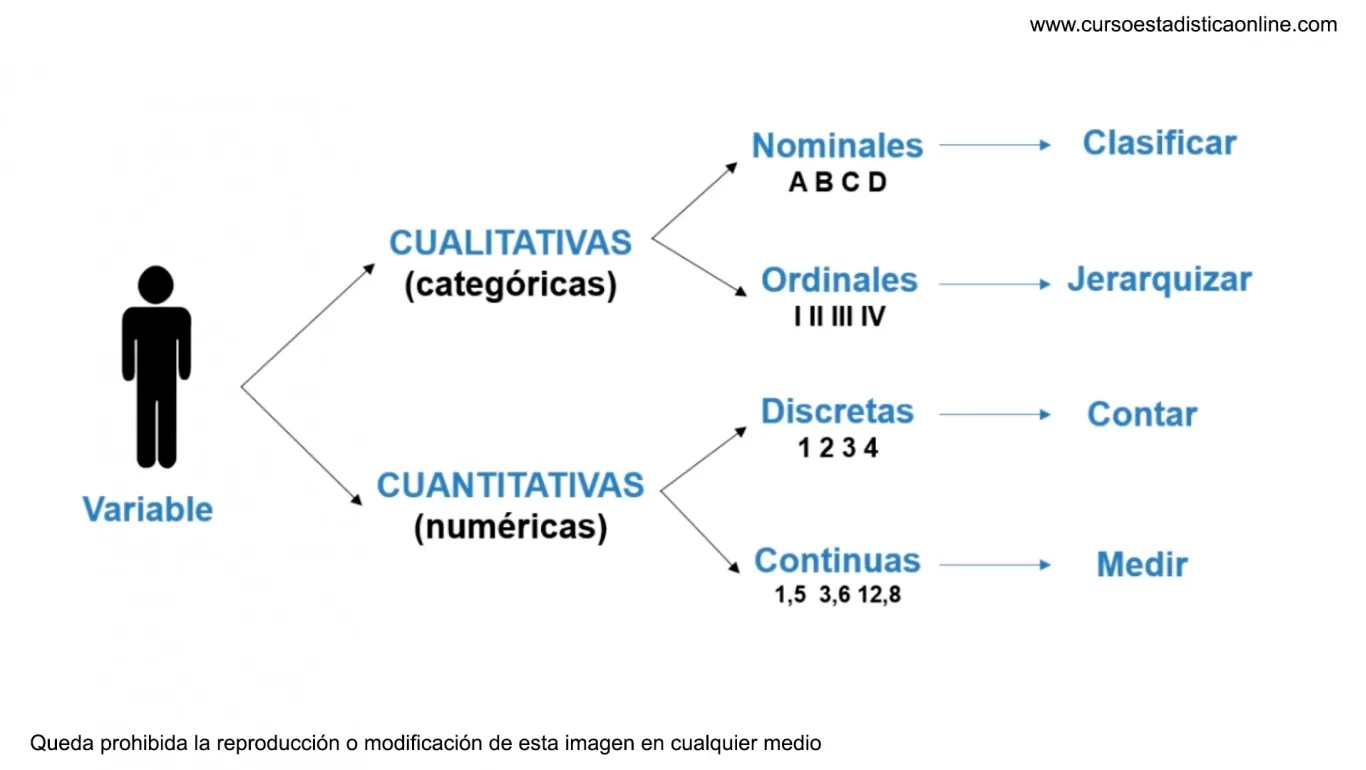

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

#Numérica discreta → Edad (en años)
edad = np.random.randint(18, 60, 50)
#Numérica continua → Ingreso mensual (en pesos)
ingreso = np.random.normal(35000, 12000, 50).round(2)
#Categórica nominal → Género
genero = np.random.choice(["Hombre", "Mujer"], 50)
#Categórica nominal → Ciudad
ciudad = np.random.choice(["CDMX", "Guadalajara", "Monterrey"], 50)
#Categórica ordinal → Nivel educativo
nivel_educativo = pd.Categorical(
    np.random.choice(["Secundaria", "Preparatoria", "Licenciatura", "Posgrado"], 50),
    categories=["Secundaria", "Preparatoria", "Licenciatura", "Posgrado"],
    ordered=True
)

df = pd.DataFrame({
    "Edad": edad,
    "Ingreso": ingreso,
    "Genero": genero,
    "Ciudad": ciudad,
    "Nivel_Educativo": nivel_educativo
})

df.head()

,Edad,Ingreso,Genero,Ciudad,Nivel_Educativo
0,56,20682.10,Mujer,Guadalajara,Licenciatura
1,46,30091.38,Mujer,Monterrey,Licenciatura
2,32,29639.10,Hombre,CDMX,Posgrado
3,25,53290.90,Hombre,Guadalajara,Posgrado
4,38,38876.00,Hombre,CDMX,Secundaria


#Categórica

## Bar chart

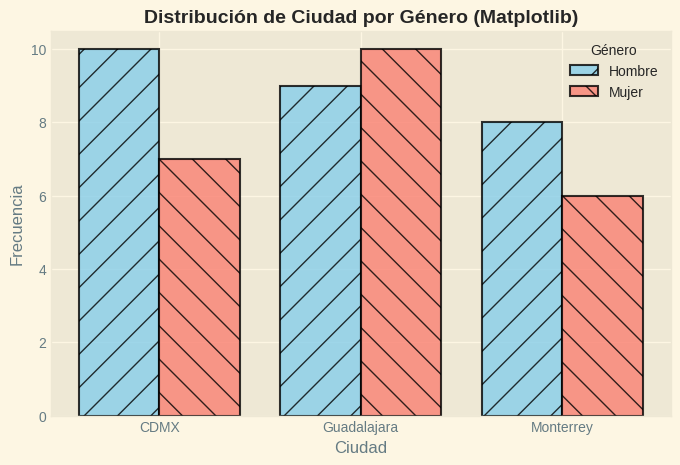

In [ ]:
import matplotlib.pyplot as plt
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

plt.style.use("Solarize_Light2") #plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(8,5))

#Conteo de valores por Ciudad y Género
conteo_ciudad_genero = df.groupby(["Ciudad", "Genero"]).size().unstack(fill_value=0)

#Posiciones en eje X
x = np.arange(len(conteo_ciudad_genero.index))
width = 0.4 #Ancho de cada barra

#Barras para Hombre
plt.bar(
    x - width/2, conteo_ciudad_genero["Hombre"],  #categorías (X) y frecuencias (Y)
    width=width,                                  #ancho
    color="skyblue",                              #color personalizado
    alpha=0.8,                                    #transparencia
    edgecolor="black",                            #color del borde de barras
    linewidth=1.5,                                #grosor de borde
    hatch="/" ,                                   #relleno del bin (las diagonales)
    label="Hombre"                                #leyenda / etiqueta
)

#Barras para Mujer
plt.bar(
    x + width/2, conteo_ciudad_genero["Mujer"],
    width=width,
    color="salmon",
    alpha=0.8,
    edgecolor="black",
    linewidth=1.5,
    hatch="\\",                                   #diferente patrón
    label="Mujer"
)

plt.xticks(x, conteo_ciudad_genero.index) #nombres de ciudades en X
plt.title("Distribución de Ciudad por Género (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia")
plt.legend(title="Género")
plt.show()

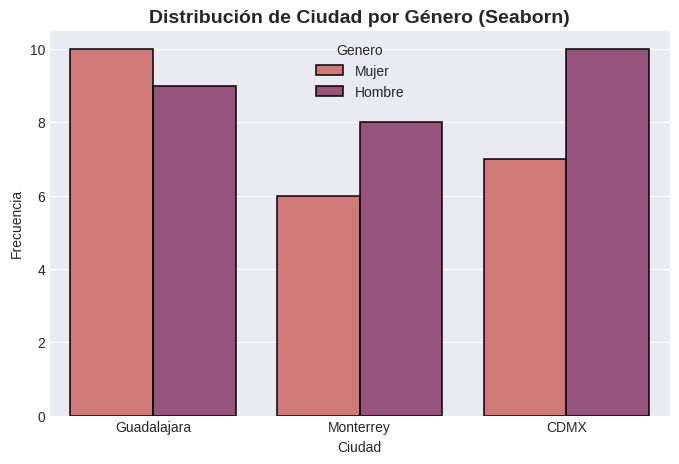

In [ ]:
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.countplot.html

plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x="Ciudad",                 #variable categórica
    hue="Genero",               #color por variable categórica
    palette="flare",            #paleta de colores
    alpha=0.9,                  #transparencia
    edgecolor="black",          #color del borde
    linewidth=1.2               # grosor del borde
)

plt.title("Distribución de Ciudad por Género (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia")
plt.legend(title="Genero")
plt.show()

## Pie chart

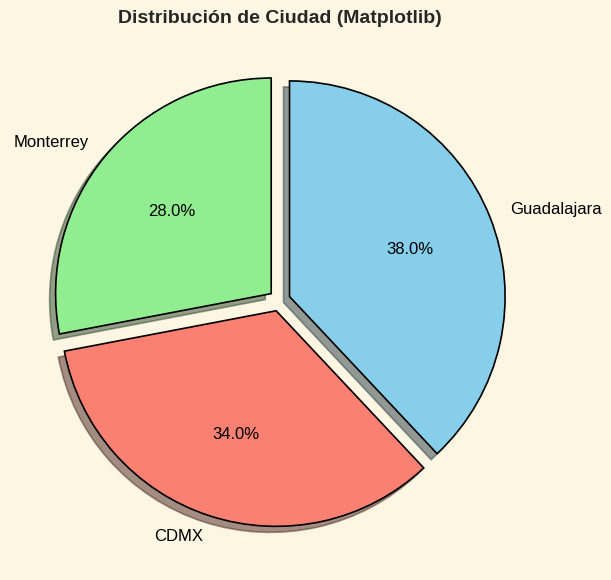

In [ ]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(7,7))

conteo_ciudad = df["Ciudad"].value_counts()

# Gráfico de pastel
plt.pie(
    conteo_ciudad.values,
    labels=conteo_ciudad.index,           #etiquetas
    autopct="%1.1f%%",                    #formato de la etiqueta
    startangle=90,                        #rotación inicial
    counterclock=False,
    explode=[0.05]*len(conteo_ciudad),    #separar todas las rebanadas (meramente visual)
    colors=["skyblue", "salmon", "lightgreen"],
    shadow=True,                          #sombra
    wedgeprops={"edgecolor":"black","linewidth":1.2},
    textprops={"fontsize":12,"color":"black"}
)

plt.title("Distribución de Ciudad (Matplotlib)", fontsize=14, fontweight="bold")
plt.show()

/tmp/ipython-input-2365909327.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




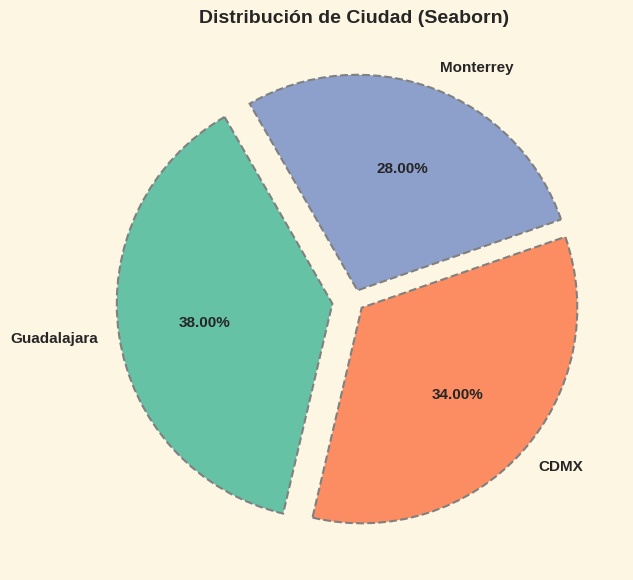

In [ ]:
plt.figure(figsize=(7,7))

sns.countplot(
    data=df, x="Ciudad",
    palette="Set2"
)

#Reemplazamos con plt.pie usando esos conteos
conteo_ciudad = df["Ciudad"].value_counts()
plt.clf()

plt.pie(
    conteo_ciudad.values,
    labels=conteo_ciudad.index,
    autopct="%1.2f%%",       #porcentajes con 2 decimales
    startangle=120,          #rotación inicial (en grados)
    explode=[0.1,0.05,0.05], #separar las rebanadas
    colors=sns.color_palette("Set2"), #paleta de Seaborn
    shadow=False,
    wedgeprops={"edgecolor":"gray","linestyle":"--","linewidth":1.5},
    textprops={"fontsize":11,"weight":"bold"}
)

plt.title("Distribución de Ciudad (Seaborn)", fontsize=14, fontweight="bold")
plt.show()

#Numérica

## Line chart

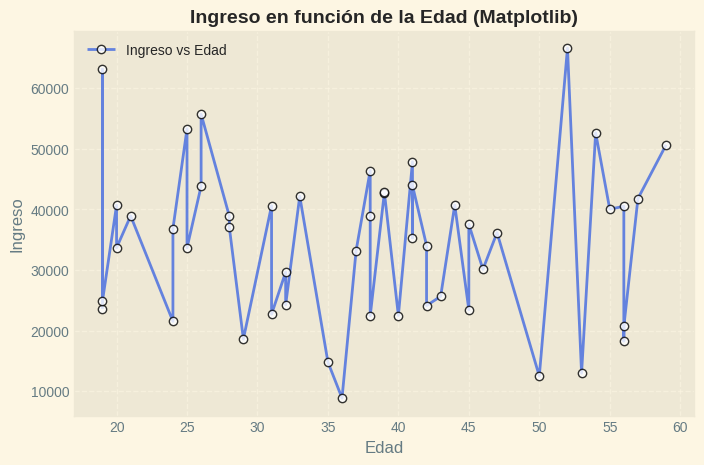

In [ ]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,5))

#Ordenamos por edad
df_sorted = df.sort_values("Edad")

plt.plot(
    df_sorted["Edad"], df_sorted["Ingreso"],
    color="royalblue",          #color de línea
    linestyle="-",              #estilo de línea (-, --, -., :)
    linewidth=2,                #grosor de línea
    marker="o",                 #marcador (o, s, ^, etc.)
    markersize=6,               #tamaño de marcador
    markerfacecolor="white",    #relleno del marcador
    markeredgecolor="black",    #borde del marcador
    alpha=0.8,                  #transparencia
    label="Ingreso vs Edad"     #etiqueta para leyenda
)

plt.title("Ingreso en función de la Edad (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

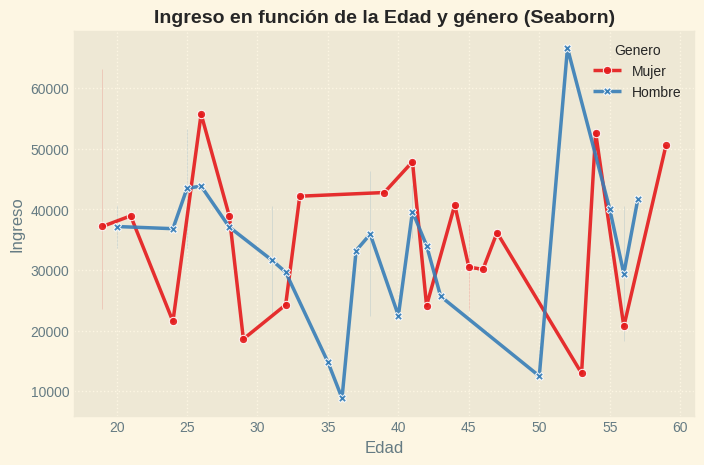

In [ ]:
plt.figure(figsize=(8,5))

sns.lineplot(
    data=df,
    x="Edad", y="Ingreso",
    hue="Genero",             #colorear según género
    style="Genero",           #estilo de línea por categoría
    markers=True,             #mostrar marcadores
    dashes=False,             #sin ---, líneas sólidas
    palette="Set1",           #paleta de colores
    linewidth=2.5,            #grosor
    alpha=0.9                 #transparencia
)

plt.title("Ingreso en función de la Edad y género (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.grid(True, linestyle=":")
plt.show()

## Histograma

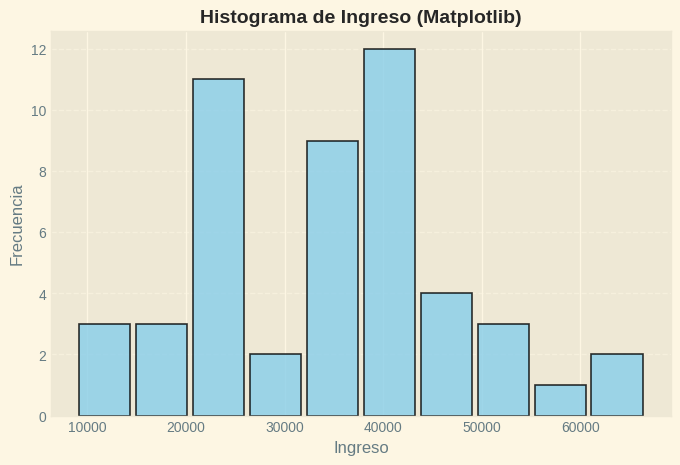

In [ ]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,5))

plt.hist(
    df["Ingreso"],                #datos numéricos
    bins=10,                      #número de "bins" (intervalos)
    color="skyblue",              #color de barras
    edgecolor="black",            #borde de las barras
    linewidth=1.2,                #grosor del borde
    alpha=0.8,                    #transparencia
    histtype="bar",
    rwidth=0.9                    #ancho relativo de las barras
)

plt.title("Histograma de Ingreso (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

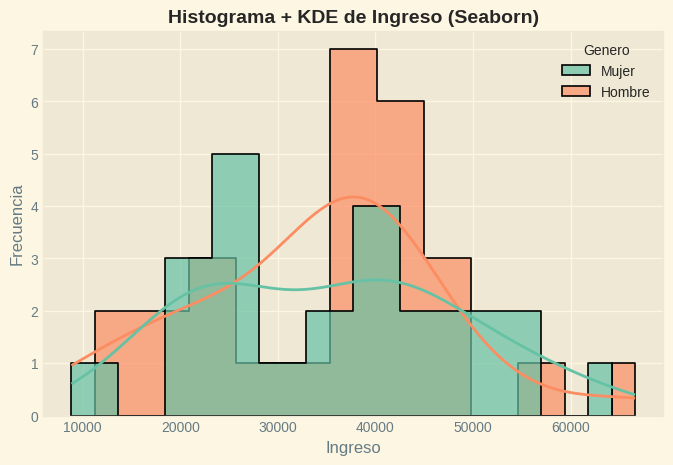

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x="Ingreso",
    bins=12,                       #número de bins
    kde=True,                      #incluir curva KDE
    hue="Genero",                  #colorear según género
    element="step",                #estilo de barras: bar, step, poly
    multiple="dodge",              #barras separadas por categoría
    palette="Set2",                #paleta de colores
    alpha=0.7,                     #transparencia
    edgecolor="black",             #borde
    linewidth=1.2                  #grosor borde
)

plt.title("Histograma + KDE de Ingreso (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.show()

## KDE

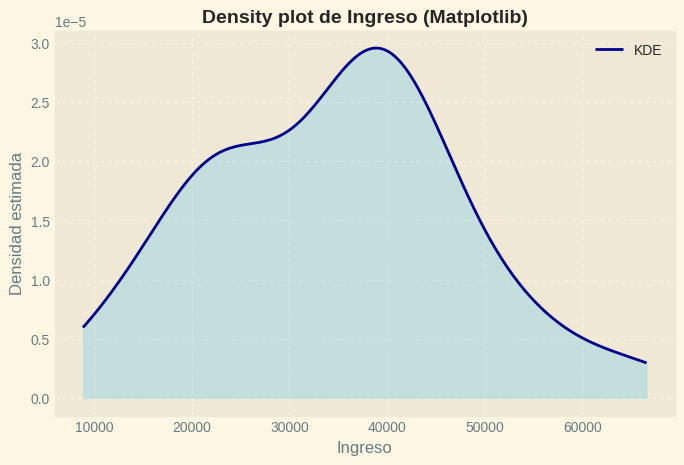

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,5))

data = df["Ingreso"]
kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 200)  # eje X

plt.plot(
    x, kde(x),
    color="darkblue", linewidth=2, linestyle="-", label="KDE"
)
plt.fill_between(x, kde(x), color="skyblue", alpha=0.4)  # área bajo la curva

plt.title("Density plot de Ingreso (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Ingreso")
plt.ylabel("Densidad estimada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

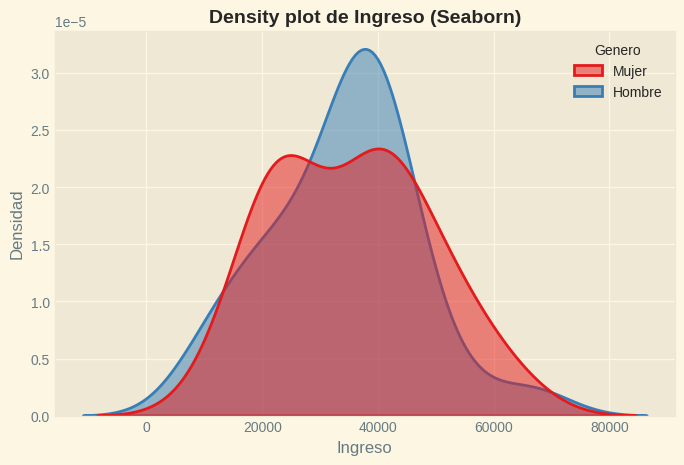

In [ ]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df,
    x="Ingreso",
    hue="Genero",         #densidad por categoría
    fill=True,            #área rellena / false muestra solo la linea sin ela rea bajo la curva
    common_norm=False,    #normaliza por grupo
    alpha=0.5,            #transparencia
    linewidth=2,          #grosor de curva
    palette="Set1"        #paleta de colores
)

plt.title("Density plot de Ingreso (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Ingreso")
plt.ylabel("Densidad")
plt.show()

# Numérica y Numérica

## Scatter plot

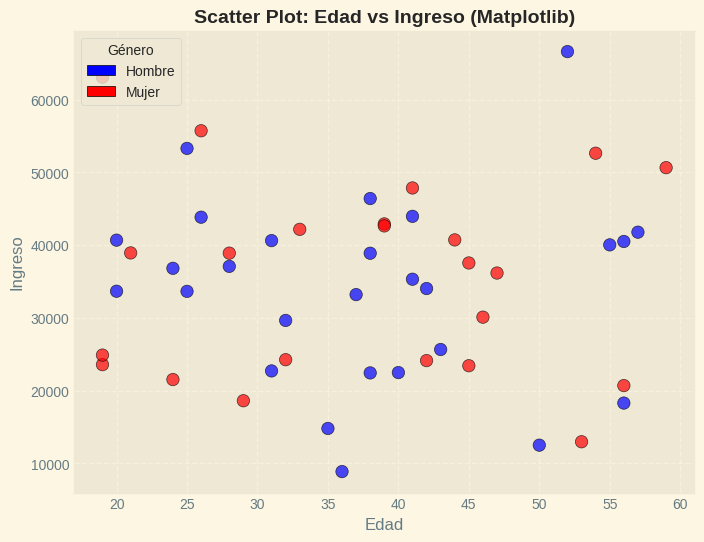

In [ ]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,6))

plt.scatter(
    df["Edad"], df["Ingreso"],
    c=df["Genero"].map({"Hombre":"blue", "Mujer":"red"}),  # color por género
    alpha=0.7,
    edgecolors="black",
    linewidths=0.5,
    marker="o",
    s=80
)

#Leyenda manual
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="blue", edgecolor="black", label="Hombre"),
    Patch(facecolor="red", edgecolor="black", label="Mujer")
]

plt.legend(
    handles=legend_elements,
    title="Género",
    loc="upper left",
    frameon=True,
    fontsize=10
)

plt.title("Scatter Plot: Edad vs Ingreso (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

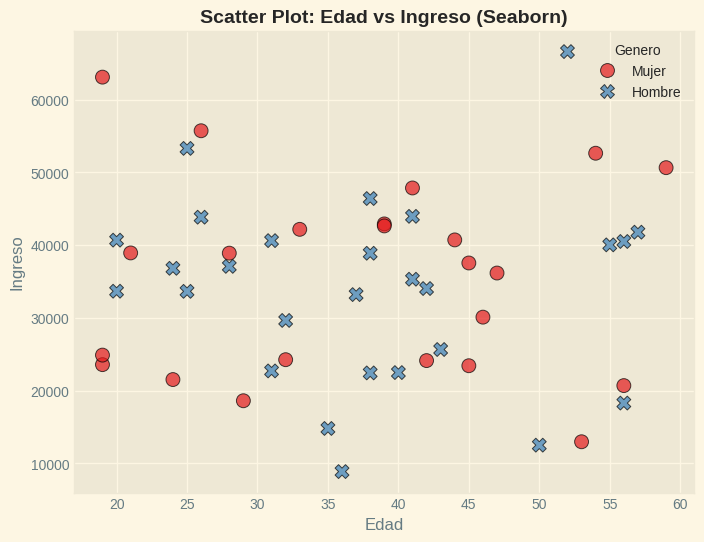

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x="Edad", y="Ingreso",
    hue="Genero",                  #color por categoría
    style="Genero",                #estilo de marcador por categoría
    palette="Set1",                #paleta de colores
    s=100,                         #tamaño de los puntos
    edgecolor="black",             #color del borde
    linewidth=0.7,
    alpha=0.7
)

plt.title("Scatter Plot: Edad vs Ingreso (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.show()

# Numérica y Categórica

## Boxplot

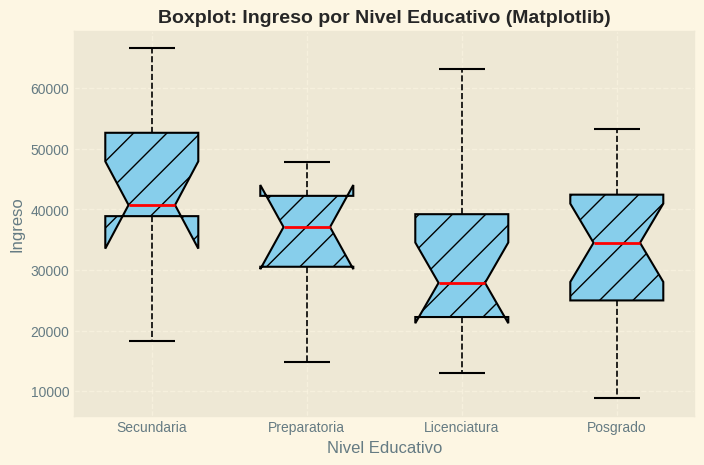

In [ ]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,5))

#Boxplot por categoría
box_data = [df[df["Nivel_Educativo"]==nivel]["Ingreso"] for nivel in df["Nivel_Educativo"].cat.categories]

plt.boxplot(
    box_data,
    tick_labels=df["Nivel_Educativo"].cat.categories, #nombres de categorías
    patch_artist=True,                                #rellenar cajas con color
    notch=True,                                       #dibujar linea en la mediana
    widths=0.6,                                       #ancho de las cajas
    boxprops=dict(facecolor="skyblue", color="black", linewidth=1.5, hatch="/"),  #estilo caja
    medianprops=dict(color="red", linewidth=2),       #estilo mediana
    whiskerprops=dict(color="black", linewidth=1.2, linestyle="--"),              #bigotes del boxplot
    capprops=dict(color="black", linewidth=1.5),      #líneas de tope (min y max)
    flierprops=dict(marker="o", markerfacecolor="green", markersize=6, alpha=0.7)  #outliers (no hay)
)

plt.title("Boxplot: Ingreso por Nivel Educativo (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Nivel Educativo")
plt.ylabel("Ingreso")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

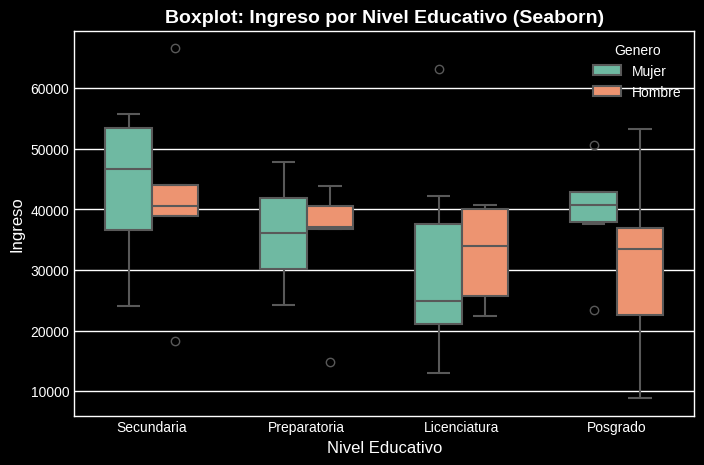

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="Nivel_Educativo",
    y="Ingreso",
    hue="Genero",
    palette="Set2",
    notch=False,#ver TRUE
    width=0.6,
    fliersize=6,
    linewidth=1.5,
    saturation=0.8
)

plt.title("Boxplot: Ingreso por Nivel Educativo (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Nivel Educativo")
plt.ylabel("Ingreso")
plt.show()

## Violin Plot

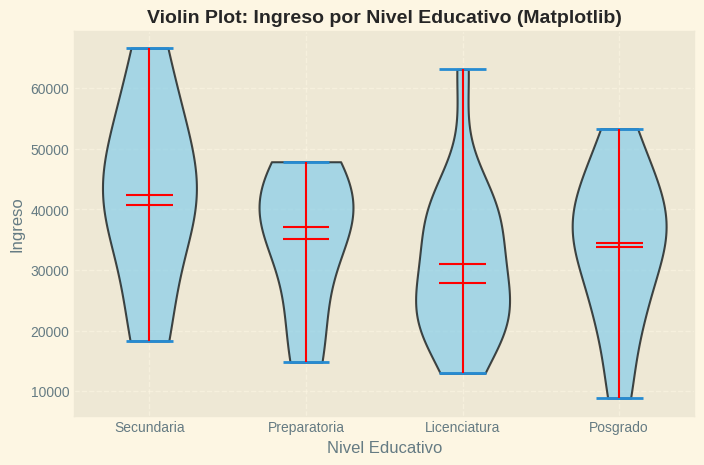

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,5))

#Datos por categoría
violin_data = [df[df["Nivel_Educativo"]==nivel]["Ingreso"] for nivel in df["Nivel_Educativo"].cat.categories]

parts = plt.violinplot(
    violin_data,
    showmeans=True,            #mostrar media
    showmedians=True,          #mostrar mediana
    showextrema=True,          #mostrar mínimo y máximo
    widths=0.6
)

#Personalización de colores
for pc in parts['bodies']:
    pc.set_facecolor('skyblue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)
    pc.set_linewidth(1.5)
for partname in ['cbars','cmedians','cmeans']:
    vp = parts[partname]
    vp.set_edgecolor('red')
    vp.set_linewidth(1.5)

plt.xticks(range(1, len(df["Nivel_Educativo"].cat.categories)+1), df["Nivel_Educativo"].cat.categories)
plt.title("Violin Plot: Ingreso por Nivel Educativo (Matplotlib)", fontsize=14, fontweight="bold")
plt.xlabel("Nivel Educativo")
plt.ylabel("Ingreso")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

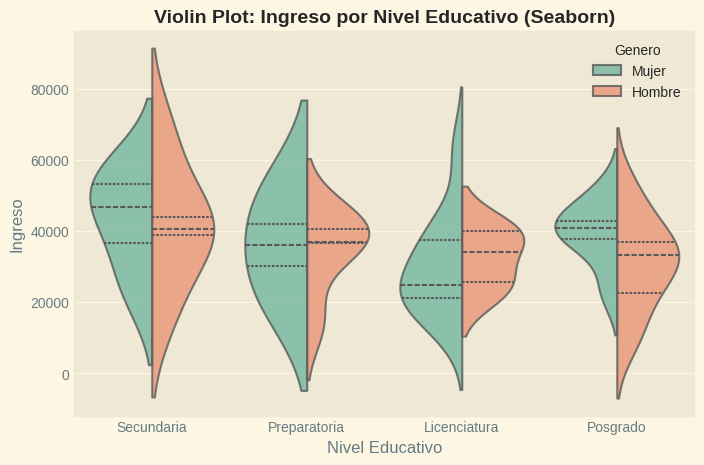

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))

sns.violinplot(
    data=df,
    x="Nivel_Educativo",
    y="Ingreso",
    hue="Genero",
    palette="Set2",
    split=True,             #dividir violín por género
    inner="quartile",       #mostrar cuartiles
    linewidth=1.5,
    density_norm='width',   #ancho proporcional
    alpha=0.8
)

plt.title("Violin Plot: Ingreso por Nivel Educativo (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Nivel Educativo")
plt.ylabel("Ingreso")
plt.show()

# Heatmap

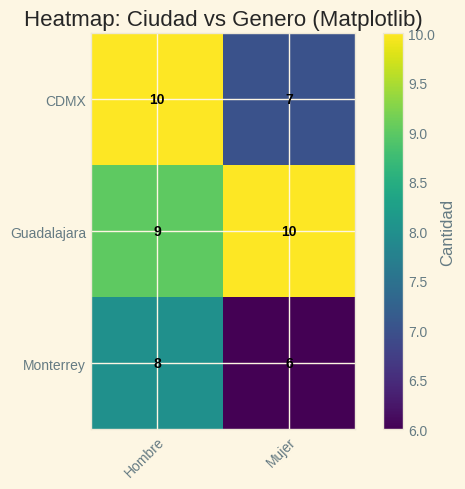

In [ ]:
#Ciudad x Genero
counts = df.groupby(["Ciudad","Genero"]).size().unstack(fill_value=0)
cities = counts.index.tolist()
genders = counts.columns.tolist()
data = counts.values

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(data, cmap="viridis")

ax.set_xticks(range(len(genders)))
ax.set_xticklabels(genders, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(cities)))
ax.set_yticklabels(cities)

for i in range(len(cities)):
    for j in range(len(genders)):
        ax.text(j, i, data[i, j],
                ha="center", va="center", color="black", fontweight="bold")

#Barra de color
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label("Cantidad")

ax.set_title("Heatmap: Ciudad vs Genero (Matplotlib)")
fig.tight_layout()
plt.show()

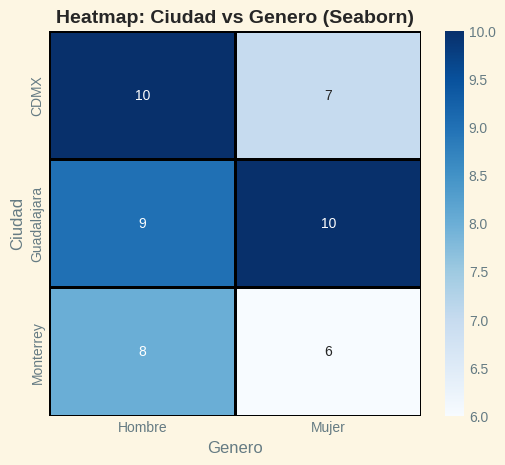

In [ ]:
plt.figure(figsize=(6,5))
counts = df.groupby(["Ciudad","Genero"]).size().unstack(fill_value=0)

sns.heatmap(
    counts,
    annot=True, fmt="d",
    cmap="Blues",
    linewidths=1,
    linecolor="black"
)
plt.title("Heatmap: Ciudad vs Genero (Seaborn)", fontsize=14, fontweight="bold")
plt.xlabel("Genero")
plt.ylabel("Ciudad")
plt.show()

# Recursos útiles:

## Paletas de colores:
1. https://coolors.co/palettes/trending
2. https://mycolor.space/?hex=%239309BC&sub=1
3. https://paletadecolores.com.mx/

## Estilos disponibles en Matplotlib

## 1️⃣ Estilos clásicos y básicos
- `_classic_test_patch`  
- `_mpl-gallery`  
- `_mpl-gallery-nogrid`  
- `classic`  
- `fast`  

## 2️⃣ Estilos con fondo oscuro
- `dark_background`  
- `seaborn-v0_8-dark`  
- `seaborn-v0_8-dark-palette`  
- `seaborn-v0_8-darkgrid`  

## 3️⃣ Estilos inspirados en Seaborn
- `seaborn-v0_8`  
- `seaborn-v0_8-bright`  
- `seaborn-v0_8-colorblind`  
- `seaborn-v0_8-deep`  
- `seaborn-v0_8-muted`  
- `seaborn-v0_8-notebook`  
- `seaborn-v0_8-paper`  
- `seaborn-v0_8-pastel`  
- `seaborn-v0_8-poster`  
- `seaborn-v0_8-talk`  
- `seaborn-v0_8-ticks`  
- `seaborn-v0_8-white`  
- `seaborn-v0_8-whitegrid`  

## 4️⃣ Estilos inspirados en otras fuentes
- `bmh` (Bayesian Methods for Hackers)  
- `fivethirtyeight` (estilo de la web FiveThirtyEight)  
- `ggplot` (similar a ggplot2 de R)  
- `grayscale` (escala de grises)  
- `tableau-colorblind10` (paleta accesible para daltonismo)  

## 5️⃣ Estilo recomendado para visualización rápida
- `Solarize_Light2`
